# Exploratory Data Analysis on Algerian Forest Fires Dataset

Submitted By :  Nilutpal Das

# Life Cycle of Machine Learning Project
- Problem Statement
- Data Collection
- Data Cleaning
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose best model

# 1) Problem Statement
- This dataset comprises weather data attributes.
- Can be used to predict the forest fire westher type.
- Prediction can help to monitor on fire and make correct prevention.

# 2) Data Collection
- The dataset is downloaded from UCI website.
- The dataset includes 244 instances that regroup a data of two regions of Algeria,
- The Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
- 122 instances for each region.
- The period from June 2012 to September 2012.
- The dataset includes 11 attribues and 1 output attribue (class).
- The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

### 2.1) Importing Data and Required Packages
### Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

### 2.2) Import the dataset as Pandas Dataframe

In [2]:
df = pd.read_csv('D:\Data Science\Dataset\Algerian_forest_fires_dataset\Algerian_forest_fires_dataset.csv',header=1)

### 2.3) Showing Top 5 Records

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# 3) Data Cleaning

### 3.1) Removing the unwanted rows from the dataset

In [4]:
df.drop(index=[122,123], inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

### 3.2) Adding new column name 'Region' in dataset

In [5]:
for i in range(len(df)):
    if i<=121:
        df['Region'] = 'Bejaia'
    else:
        df['Region'][i] = 'Sidi Bel-abbes'

In [6]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi Bel-abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi Bel-abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi Bel-abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi Bel-abbes


### 3.3) Renaming the names of the columns

In [7]:
df.rename(columns={' RH': 'RH', ' Ws': 'Ws', 'Rain ': 'Rain', 'Classes  ':'Classes'},inplace=True)

### 3.4) Stripping the classes features

In [8]:
df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


# 4) Exploratory Data Analysis

## 4.1) Data Profiling

### 4.1.1) Shape of the dataset

In [10]:
df.shape

(244, 15)

### Observation

- This dataset comprises of 244 Rows and 13 Columns.

### 4.1.2) Columns of the dataset

In [11]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### 4.1.3) Checking missing values

In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

### Observation

- One NuLL value in 'Classes' feature

### 4.1.4) Specifying particular Row from the dataset which is having the NuLL value

In [13]:
df.iloc[165]

day                        14
month                      07
year                     2012
Temperature                37
RH                         37
Ws                         18
Rain                      0.2
FFMC                     88.9
DMC                      12.9
DC                     14.6 9
ISI                      12.5
BUI                      10.4
FWI                   fire   
Classes                   NaN
Region         Sidi Bel-abbes
Name: 165, dtype: object

### Observation

- Some miss match positions.

### 4.1.5) Resetting missmatched position

In [14]:
df.at[165, 'DC'] = 14.6
df.at[165, 'ISI'] = 9
df.at[165, 'BUI'] = 12.5
df.at[165, 'FWI'] = 10.4
df.at[165, 'Classes'] = 'fire'

### 4.1.6) Again checking the info of that particular Row

In [15]:
df.iloc[165]

day                        14
month                      07
year                     2012
Temperature                37
RH                         37
Ws                         18
Rain                      0.2
FFMC                     88.9
DMC                      12.9
DC                       14.6
ISI                         9
BUI                      12.5
FWI                      10.4
Classes                  fire
Region         Sidi Bel-abbes
Name: 165, dtype: object

### 4.1.7) Checking again missing values

In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

### Observation

- We have zero NuLL values

### 4.1.8) Changing the datatypes of all columns

In [18]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['DC']=df['DC'].astype(float)
df['FWI']=df['FWI'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)
df['Region']=df['Region'].astype(object)

### 4.1.9) Adding new feature name 'Date' by replacing unecessary feature like 'day', 'month', 'year'

In [19]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])
df.drop(['day', 'month', 'year'],axis=1,inplace = True)

### 4.1.10) Checking unique values

In [20]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

### 4.1.11) Check datatypes of the dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    object        
 11  Region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int32(2), object(2)
memory usage: 23.0+ KB


### Observation

- 244 Rows and 13 Columns.
- No NuLL values.
- 4 datatypes int32, float64, object and datetime64.
- Datatypes included float64 = 6 Columns, int32 = 2 Columns, object = 2 Columns, datetime64 = 1 Columns.
- Total memory usage is 23.0+ KB

### 4.1.12) Checking memory usage by the dataset

In [22]:
df.memory_usage()

Index           128
Temperature     976
RH              976
Ws             1952
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
Region         1952
date           1952
dtype: int64

### Observation

- Temperature and RH uses 976 Kb memory.
- Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region and date uses 1952 Kb memory.
- datatype is int64.

### 4.1.13) Numerical and Categorical features

### (a) Numerical Data

In [23]:
# define numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# print numerical features
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))

We have 11 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'date']


### (b) Categorical Data

In [24]:
# define categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print categorical features
print('\n We have {} categorical features : {}'.format(len(categorical_features), categorical_features))


 We have 2 categorical features : ['Classes', 'Region']


## 4.2) Feature Information

### (a) Weather data Components

- Temperature : temperature noon (temperature max) in Celsius degrees: 22 to 42
- RH : Relative humidity in %: 21 to 90
- Ws : Wind speed in km/h: 6 to 29
- Rain : total day in mm: 0 to 16.8

### (b) Date Components

- day, month and year is merged into date.
- date displayed in (DD/MM/YYYY) format.

### (c) FWI Components

- FFMC : Fine Fuel Moisture Code index the FWI system: 28.6 to 92.5
- DMC : Duff Moisture Code index from FWI system: 1.1 to 65.9
- ISI : Initial Spread Index from FWI system: 0 to 18.5
- BUI : Buildup Index from FWI index: 1.1 to 68
- DC : Drought Code index from FWI system: 7 to 220.4
- FWI : Fire Weather Index: 0 to 31.1
- Classes : Fire and not Fire
- Region : 1 for Bejaia region and 0 for Sidi Bel-abbes region

## 4.3) Univariate Analysis

- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

In [25]:
df.var()

Temperature      13.204817
RH              221.539415
Ws                7.897102
Rain              3.997623
FFMC            205.565939
DMC             152.968382
DC             2267.632245
ISI              17.260932
BUI             201.686818
FWI              55.180617
dtype: float64

### 4.3.1) Numerical Features Analysis

###  kde plot

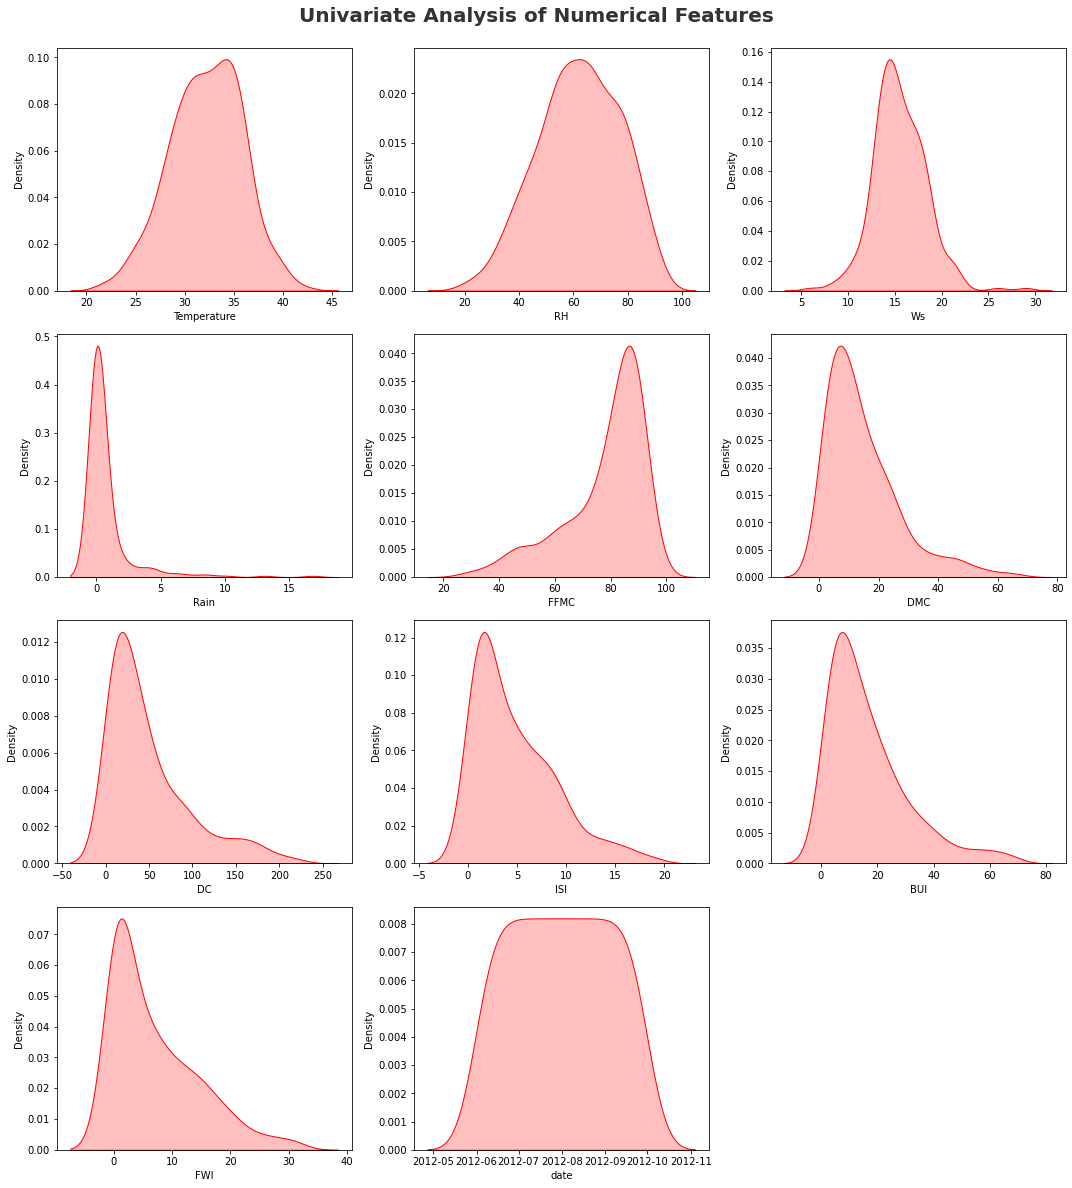

In [26]:
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='r',warn_singular=False)
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

### Observation

- Rain,ISI,BUI,DMC are right skewed and postively skewed.
- FFMC is a Left skewed and Negetively skewed.
- Outliers in Rain, ISI, BUI, DMC and FFMC

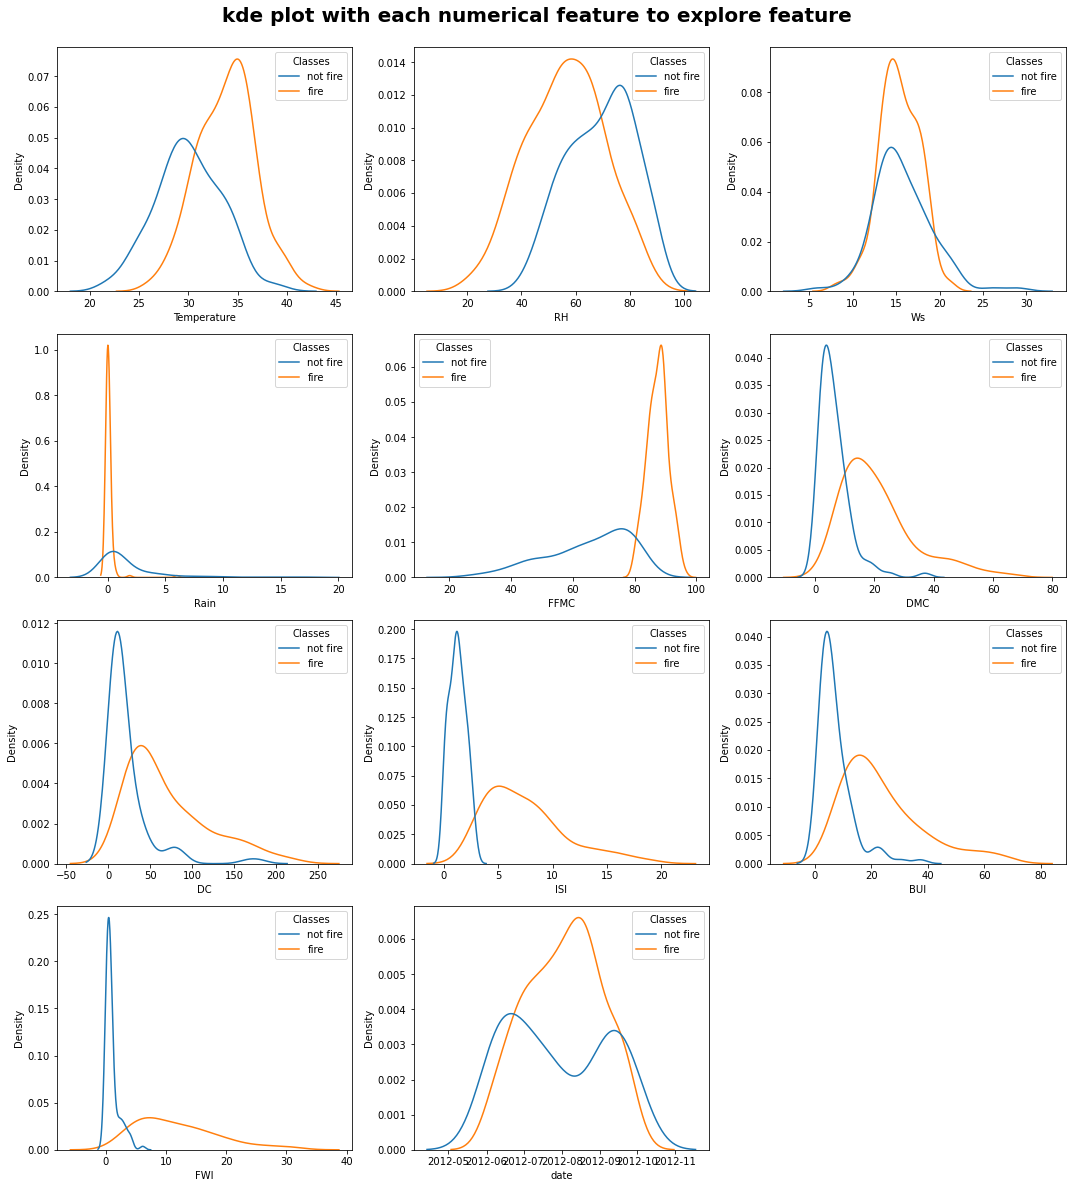

In [27]:
plt.figure(figsize=(15, 20))
plt.suptitle('kde plot with each numerical feature to explore feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=numerical_features[i],hue='Classes', data=df)
    plt.tight_layout()

### Scatter plot

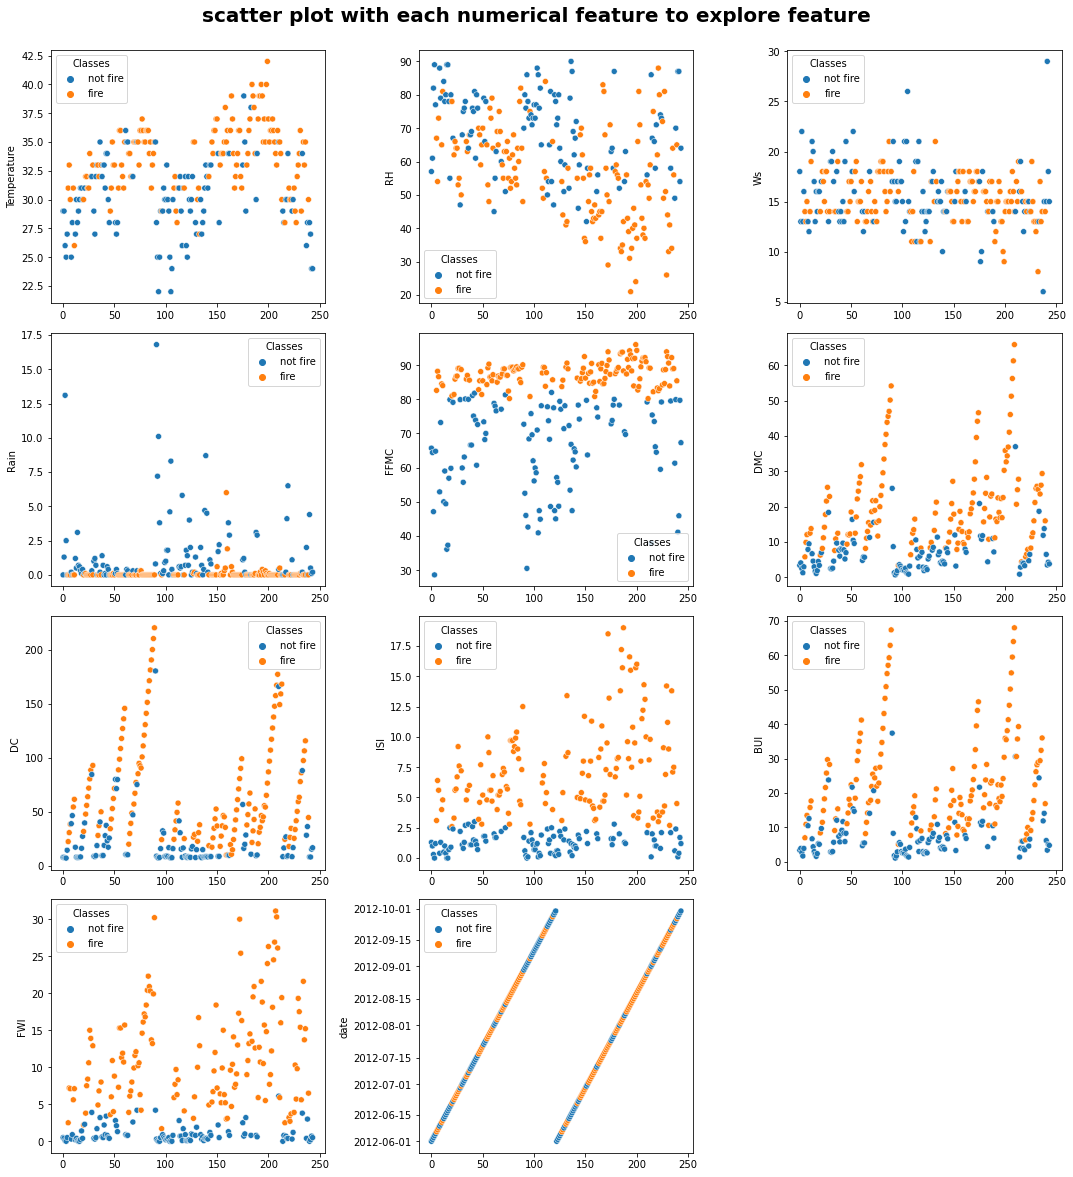

In [28]:
plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot with each numerical feature to explore feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=numerical_features[i], x=df.index, data=df,hue='Classes')
    plt.tight_layout()

### Observation

- All numerical features except date, region and classes are showing high variations

### Hist plot

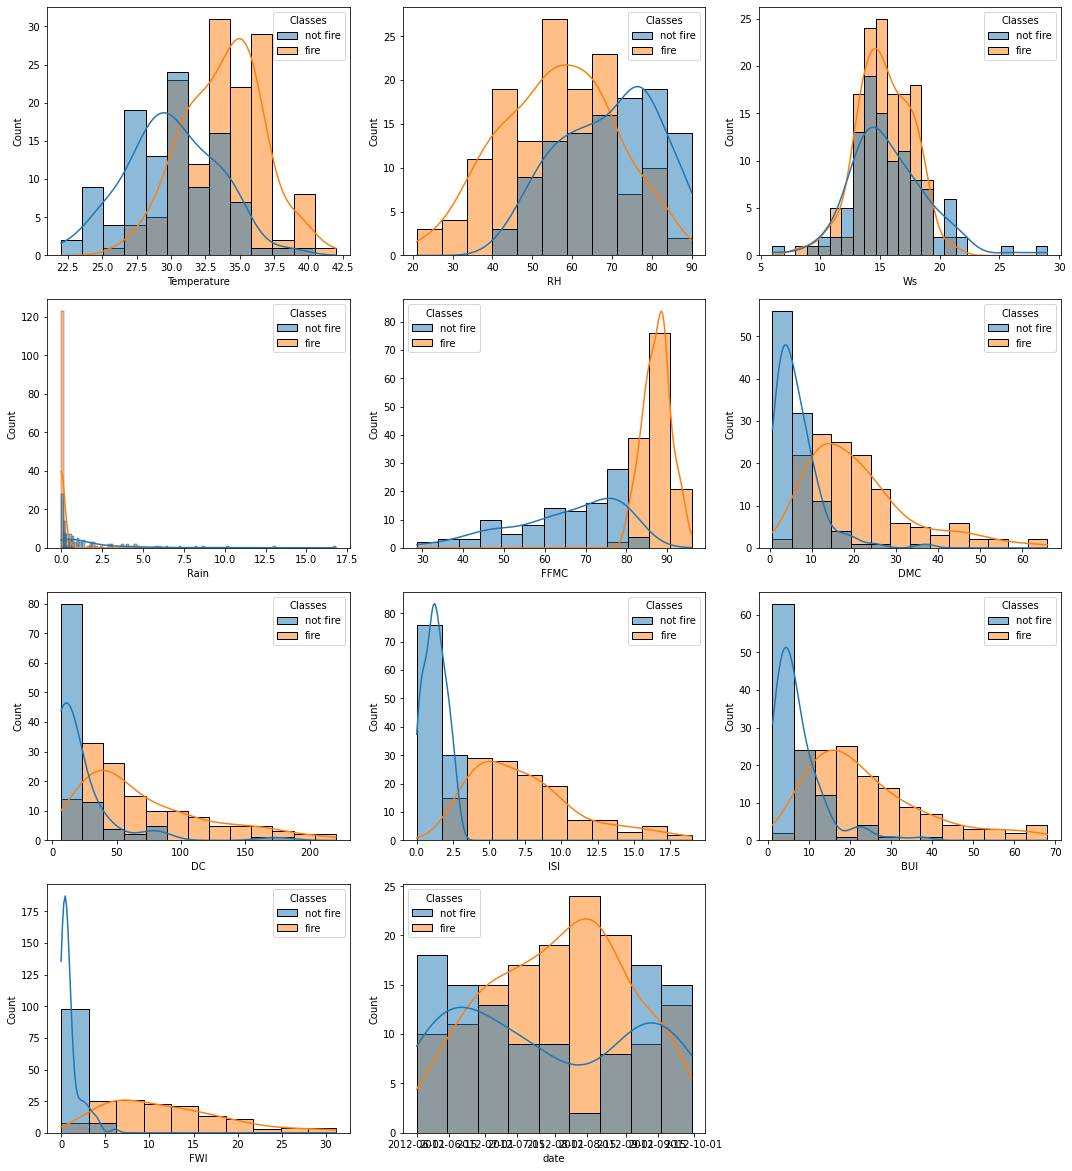

In [29]:
plt.figure(figsize=(15, 20))
# plt.suptitle(' Histplot with each numerical feature to explore feature', fontsize=20, fontweight='bold', alpha=1, y=1)
for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.histplot(x=df[numerical_features[i]], data=df, kde=True, hue='Classes')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()    

### 4.3.2) Categorical Features

### Count plot

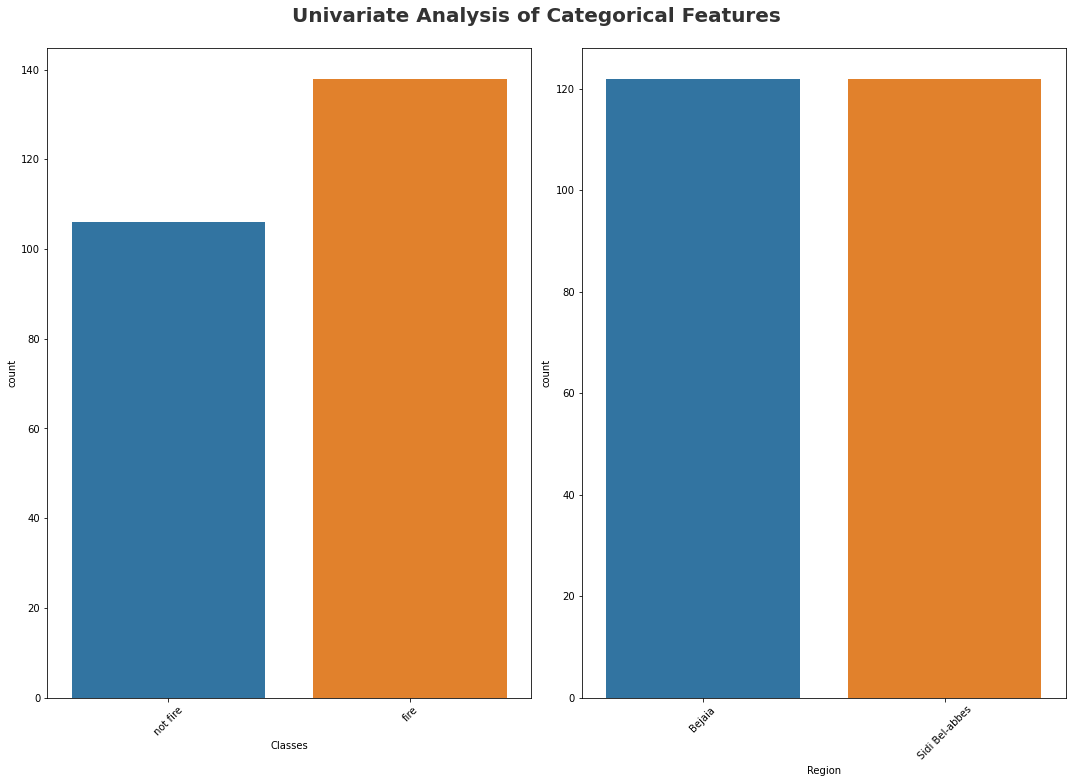

In [31]:
plt.figure(figsize=(15,20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)
cat1 = ['Classes', 'Region']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Observation

- Extreme value of Temperature is above 40
- Most of the time RH is above 30
- WS values lie between 10 to 20

### Pie chart

([<matplotlib.patches.Wedge at 0x20a6e2819d0>,
 [Text(-1.0767412667284106, -0.22500720993803208, 'fire'),
  Text(1.0767412877951015, 0.22500710912623753, 'not fire')],
 [Text(-0.5873134182154967, -0.12273120542074475, '56.557'),
  Text(0.5873134297064189, 0.12273115043249319, '43.443')])

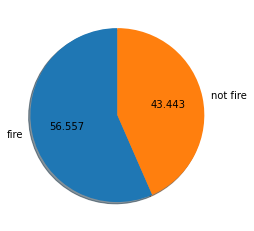

In [32]:
plt.pie(df['Classes'].value_counts(),startangle=90,autopct='%.3f',labels=['fire','not fire'],shadow=True)

([<matplotlib.patches.Wedge at 0x20a6b4c71f0>,
 [Text(-1.1, 1.3471114790620887e-16, 'Bejaia'),
  Text(1.1, -2.6942229581241775e-16, 'Sidi Bel-abbes')],
 [Text(-0.6, 7.347880794884119e-17, '50.000'),
  Text(0.6, -1.4695761589768238e-16, '50.000')])

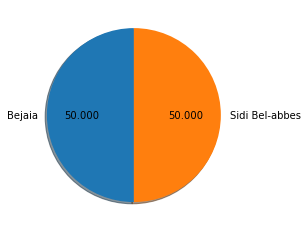

In [33]:
plt.pie(df['Region'].value_counts(),startangle=90,autopct='%.3f',labels=['Bejaia','Sidi Bel-abbes'],shadow=True)

## 4.4) Bivariate Analysis

### 4.4.1) Analysing every numerical features with classes and region.

- From Feature Information we get to know about several features.
- Some are weather oriented, date and time oriented and Fire weather index (FWI) oriented.
- RH, Temperature, Rain, Ws are major factors that indirectly or directly causes forest fire.

### Strip plot with Classes

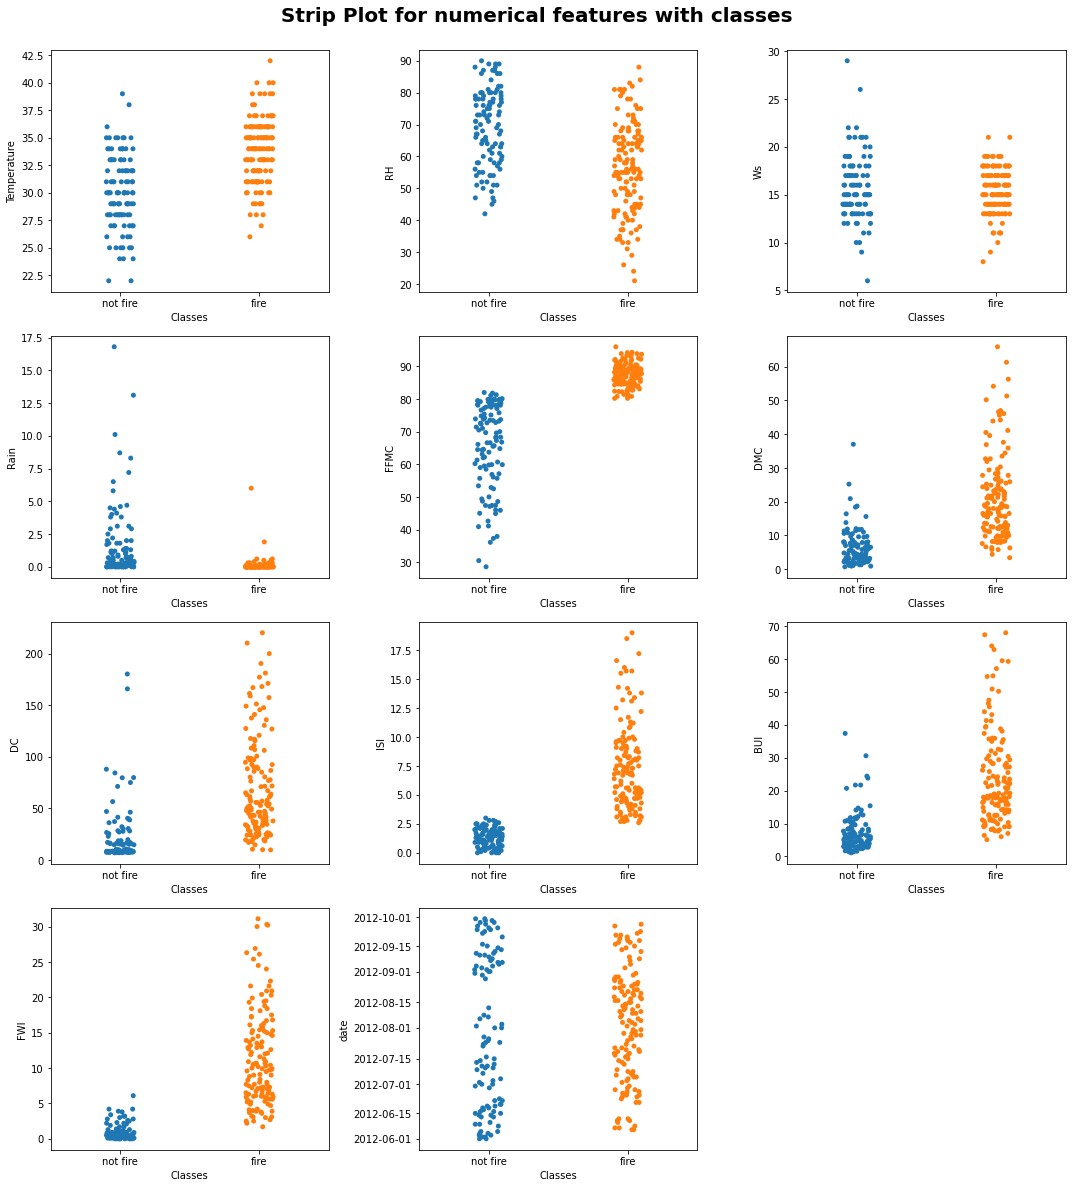

In [34]:
plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot for numerical features with classes', fontsize=20, fontweight='bold', alpha=1, y=1)
for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numerical_features[i], x='Classes', data=df)
    plt.tight_layout()

### Observation

- Increase in temperature increases the chances of catching fire.
- Low Relative Humidity (RH) increases the chances of catching fire.
- Relation with Wind speed both factors remains same.
- High rain decreases the chances of catching fire.
- High FFMC increases the chances of catching fire.
- Low DMC decreases the chances of catching fire also DMC above some value increases chances of catching fire.
- ISI after 2.5 it increases the chances of catching fire.
- High BUI increases the chances of catching fire.
- From June 2012 to September 2012,the chances of catching fire is more as compared to not catching fire.

### Strip plot with Region

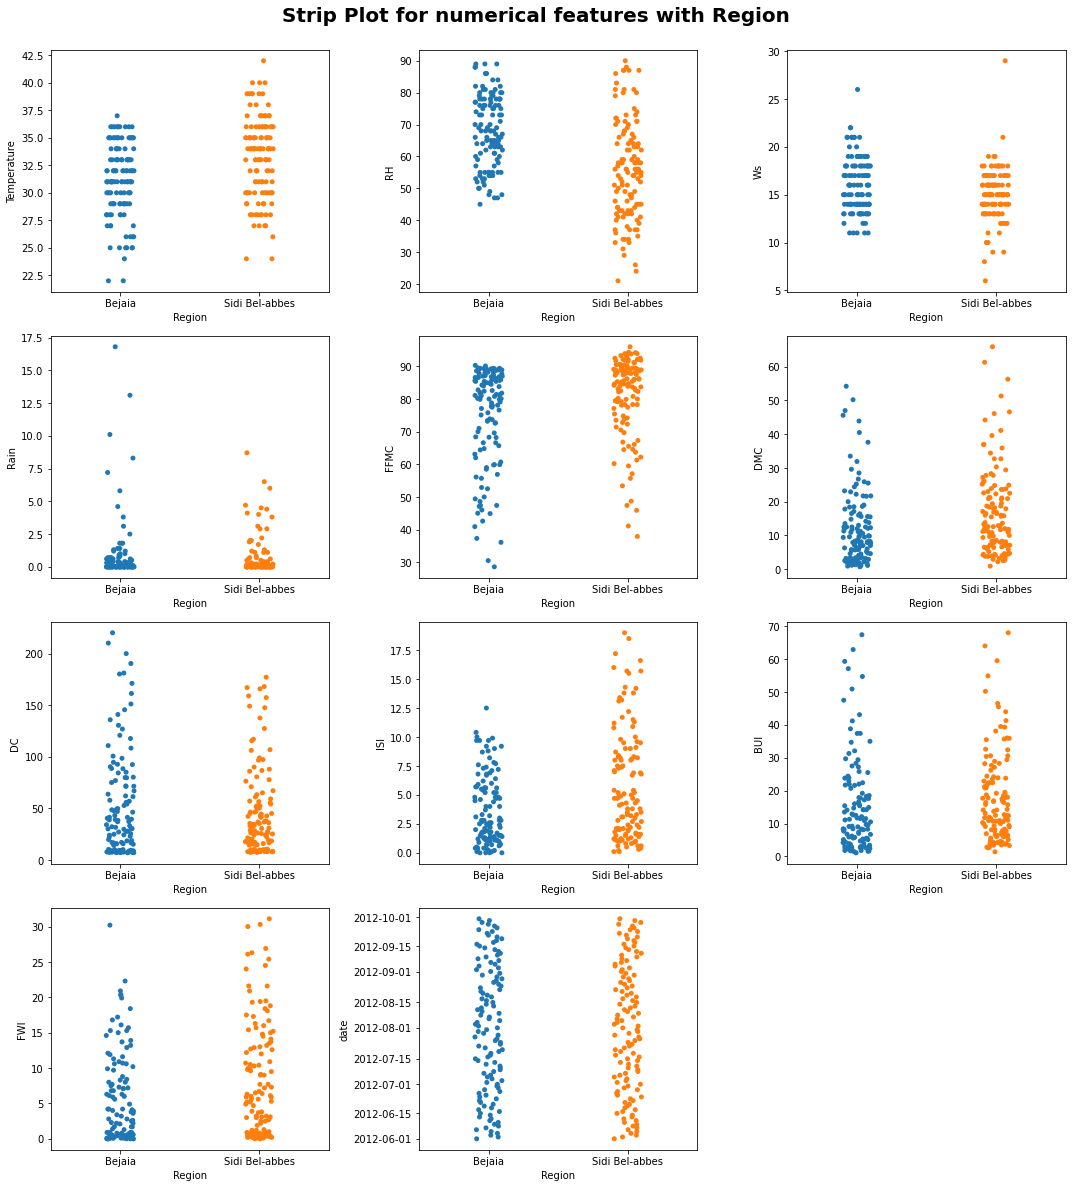

In [35]:
plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot for numerical features with Region', fontsize=20, fontweight='bold', alpha=1, y=1)
for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numerical_features[i], x='Region', data=df)
    plt.tight_layout()

### Observation

- Region Sidi Bel-abbas experiences high temperature.
- Region Sidi Bel-abbas experiences low Relative Humidity.
- Both Region experiences similar wind speed, however the region Sidi Bel-abbas experiences more with low wind speed.
- Region Bejaia experiences high rain.
- Both region experiences similar FFMC, however the region Bejaia experiences more FFMC.
- Region Bejaia experiences high DMC.
- Region Sidi Bel-abbas experiences high ISI.
- Both region experiences similar BUI.

### Bar plot with Classes

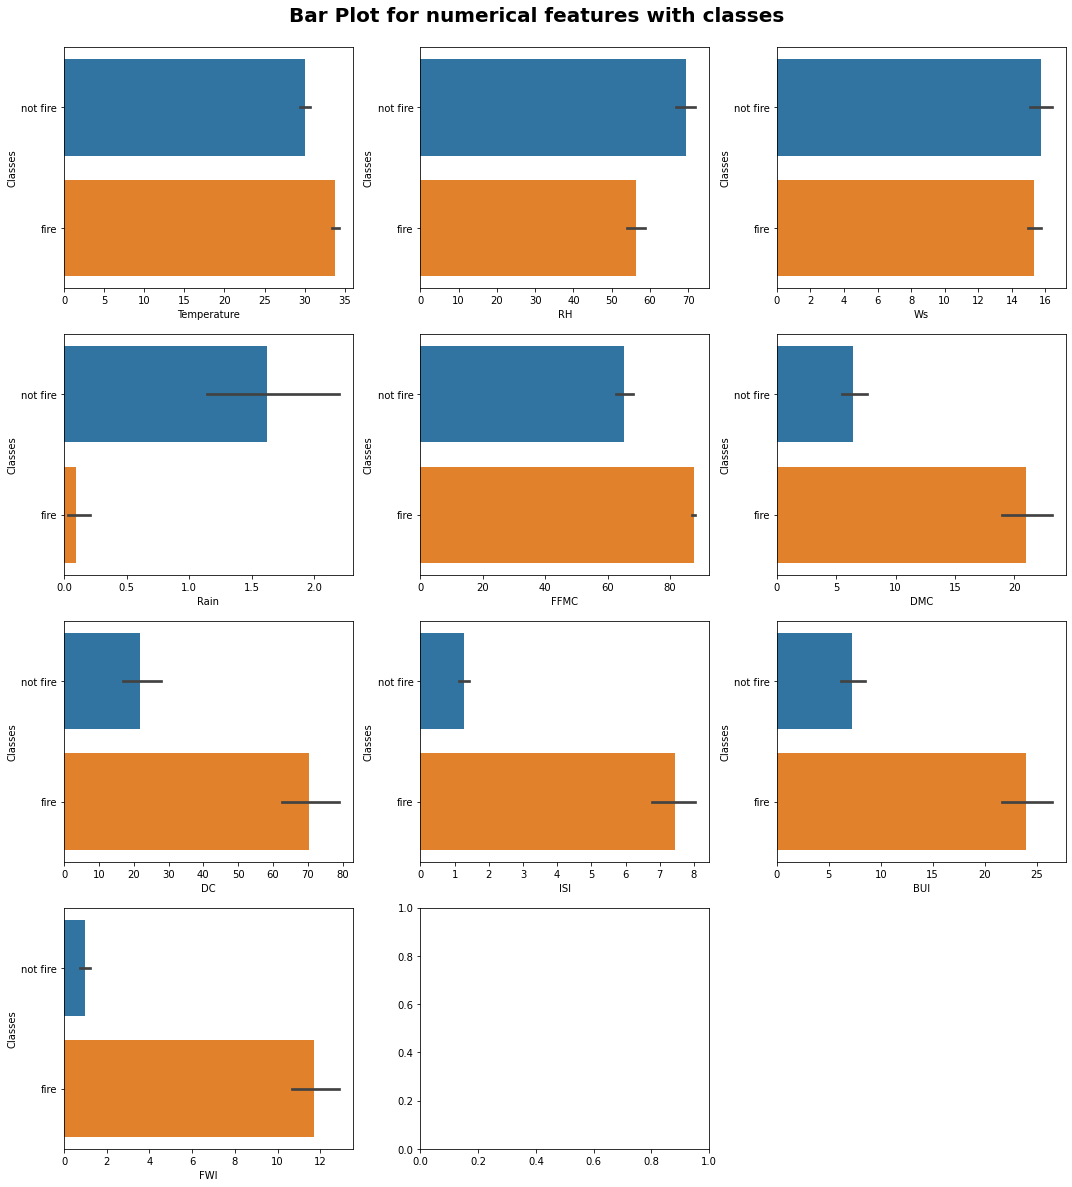

In [36]:
plt.figure(figsize=(15, 20))
plt.suptitle('Bar Plot for numerical features with classes', fontsize=20, fontweight='bold', alpha=1, y=1)
for i in range(0, len(numerical_features)):
    try:
        plt.subplot(5, 3, i+1)
        sns.barplot(x=numerical_features[i], y='Classes', data=df)
    except TypeError:
        plt.tight_layout()

### Bar plot with Region

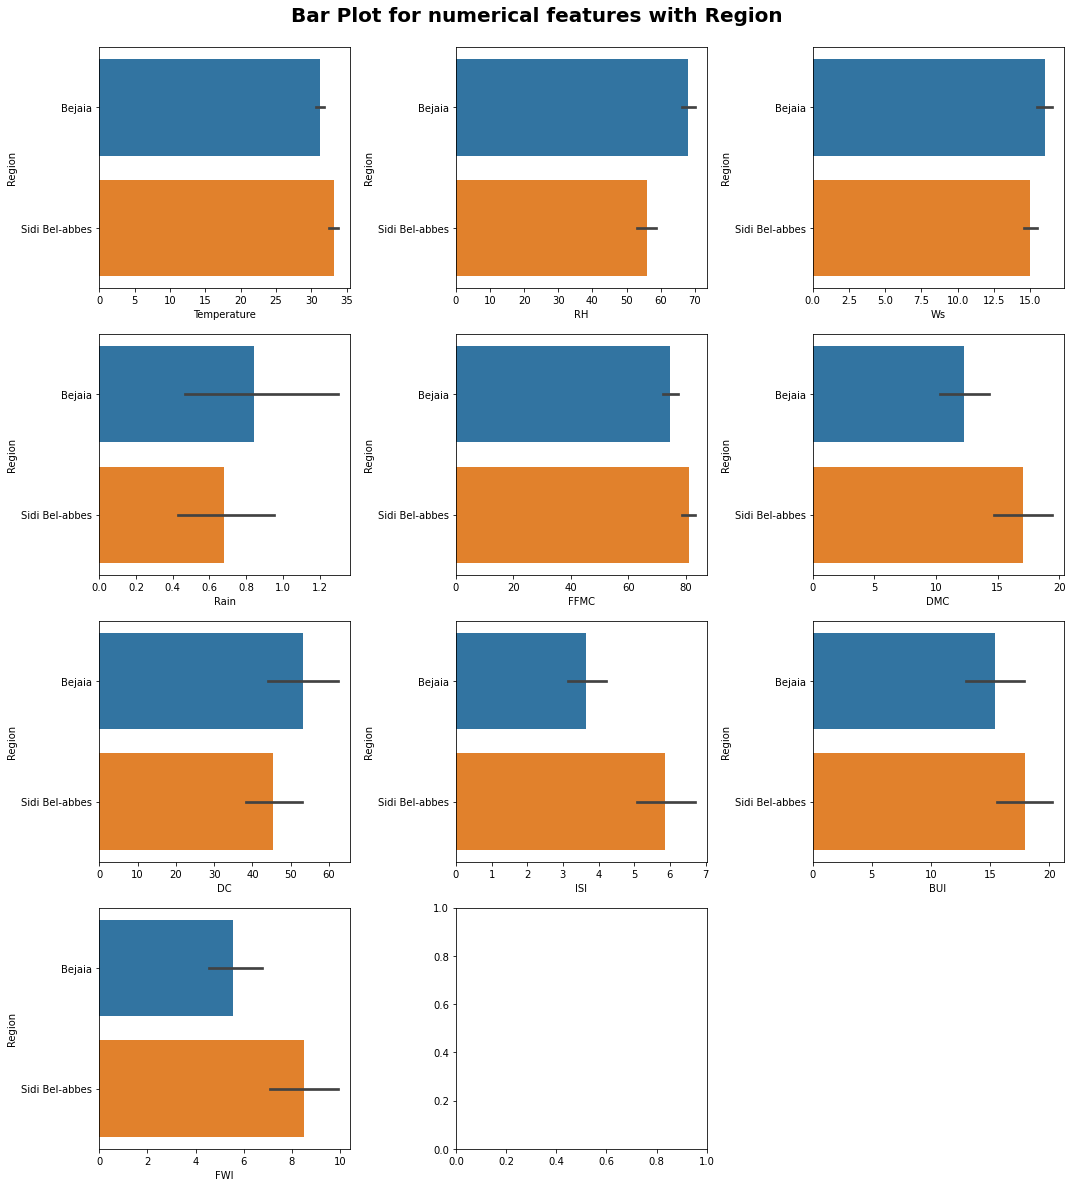

In [38]:
plt.figure(figsize=(15, 20))
plt.suptitle('Bar Plot for numerical features with Region', fontsize=20, fontweight='bold', alpha=1, y=1)
for i in range(0, len(numerical_features)):
    try:
        plt.subplot(5, 3, i+1)
        sns.barplot(x=numerical_features[i], y='Region', data=df)
    except TypeError:
        plt.tight_layout()

### Box plot with Classes

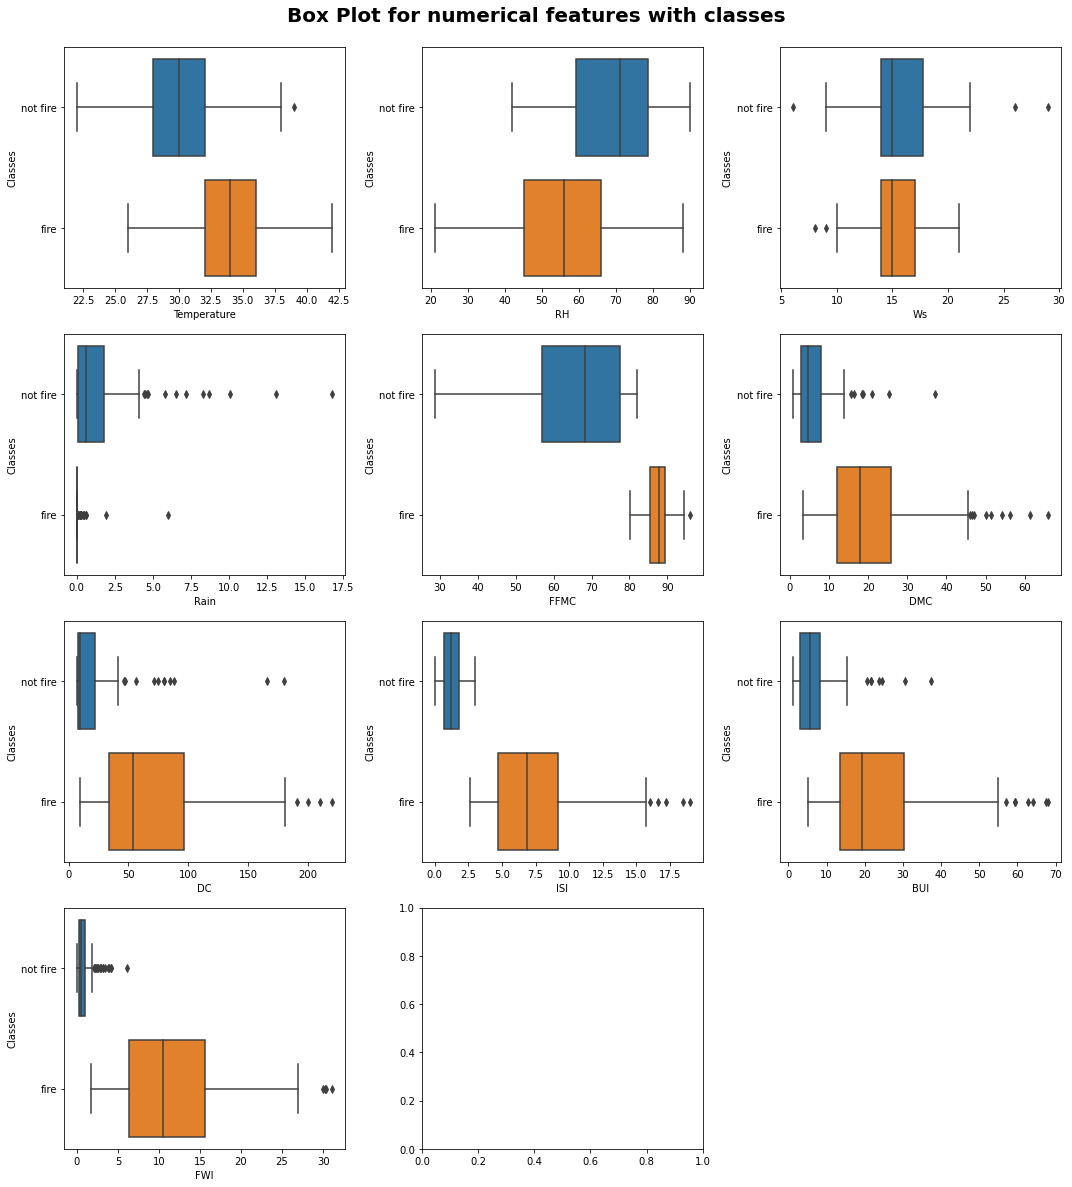

In [53]:
plt.figure(figsize=(15, 20))
plt.suptitle('Box Plot for numerical features with classes', fontsize=20, fontweight='bold', alpha=1, y=1)
for i in range(0, len(numerical_features)):
    try:
        plt.subplot(5, 3, i+1)
        sns.boxplot(x=numerical_features[i], y='Classes', data=df)
    except TypeError:
        plt.tight_layout()

### Box plot with Region

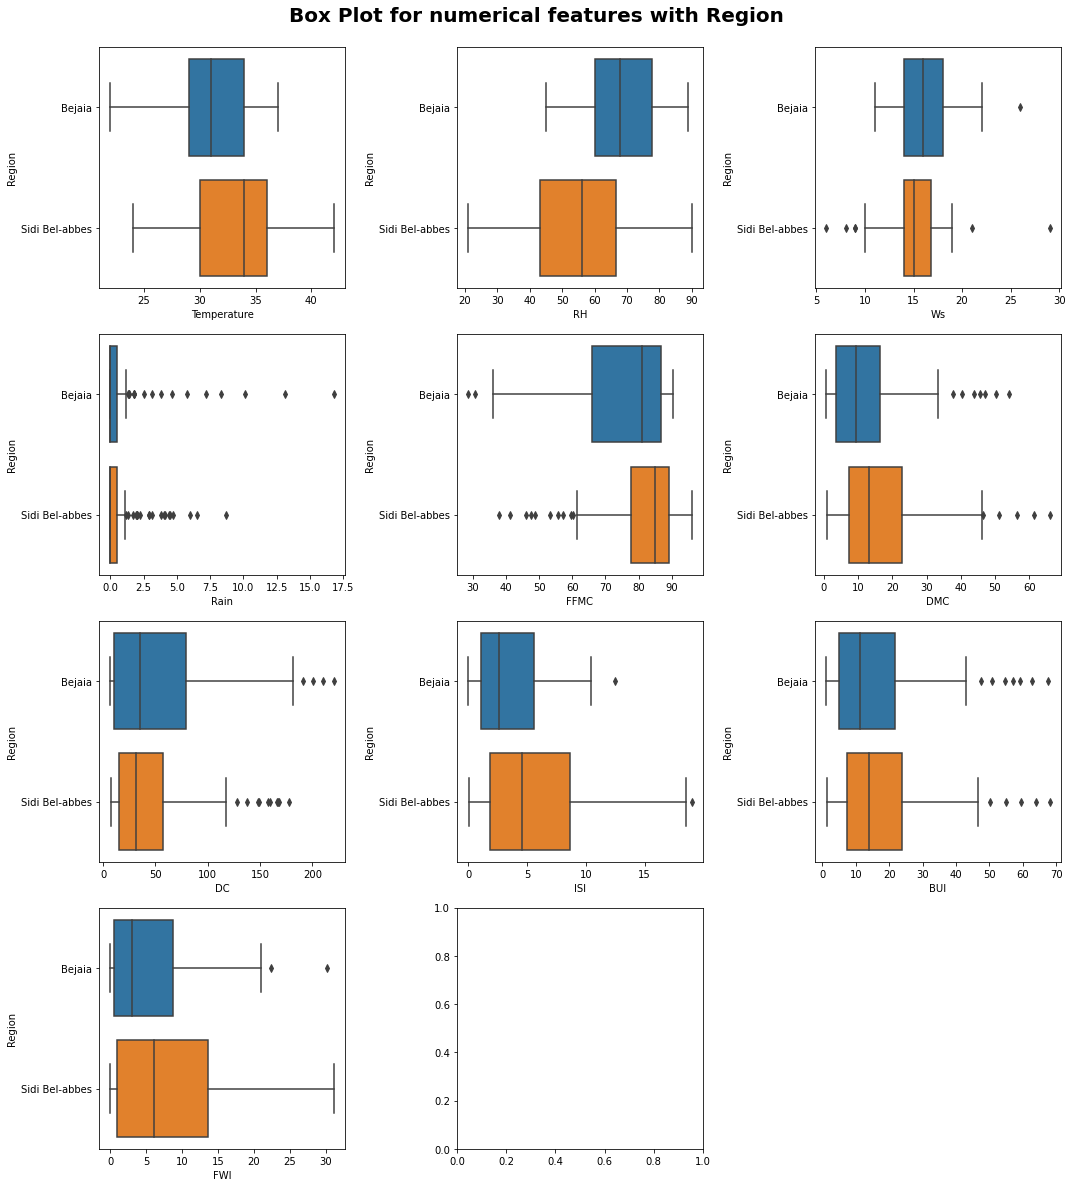

In [54]:
plt.figure(figsize=(15, 20))
plt.suptitle('Box Plot for numerical features with Region', fontsize=20, fontweight='bold', alpha=1, y=1)
for i in range(0, len(numerical_features)):
    try:
        plt.subplot(5, 3, i+1)
        sns.boxplot(x=numerical_features[i], y='Region', data=df)
    except TypeError:
        plt.tight_layout()

### Observation

- Temperature, Ws, Rain, FFMC, DMC, DC, ISI, BUI and FWI have outliers.

## 4.4) Multivariate Analysis

### Multicollinearity in Numerical features

In [42]:
df.cov()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,64.111931,9.148506,23.553987,15.300965
RH,-35.396782,221.539415,9.874739,6.635431,-137.785533,-74.580245,-156.165754,-42.561327,-73.916459,-64.178446
Ws,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,10.203135,0.142964,1.209369,0.708851
Rain,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-28.258988,-2.889611,-8.501670,-4.823366
FFMC,35.297598,-137.785533,-6.577727,-15.595918,205.565939,106.820535,344.044709,44.124525,120.185186,73.640607
DMC,21.712423,-74.580245,-0.043306,-7.135415,106.820535,152.968382,515.552604,34.856991,172.521016,80.407612
DC,64.111931,-156.165754,10.203135,-28.258988,344.044709,515.552604,2267.632245,99.696270,636.831657,260.718118
ISI,9.148506,-42.561327,0.142964,-2.889611,44.124525,34.856991,99.696270,17.260932,37.841354,28.467868
BUI,23.553987,-73.916459,1.209369,-8.501670,120.185186,172.521016,636.831657,37.841354,201.686818,90.399916
FWI,15.300965,-64.178446,0.708851,-4.823366,73.640607,80.407612,260.718118,28.467868,90.399916,55.180617


In [43]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000


### Pair plot

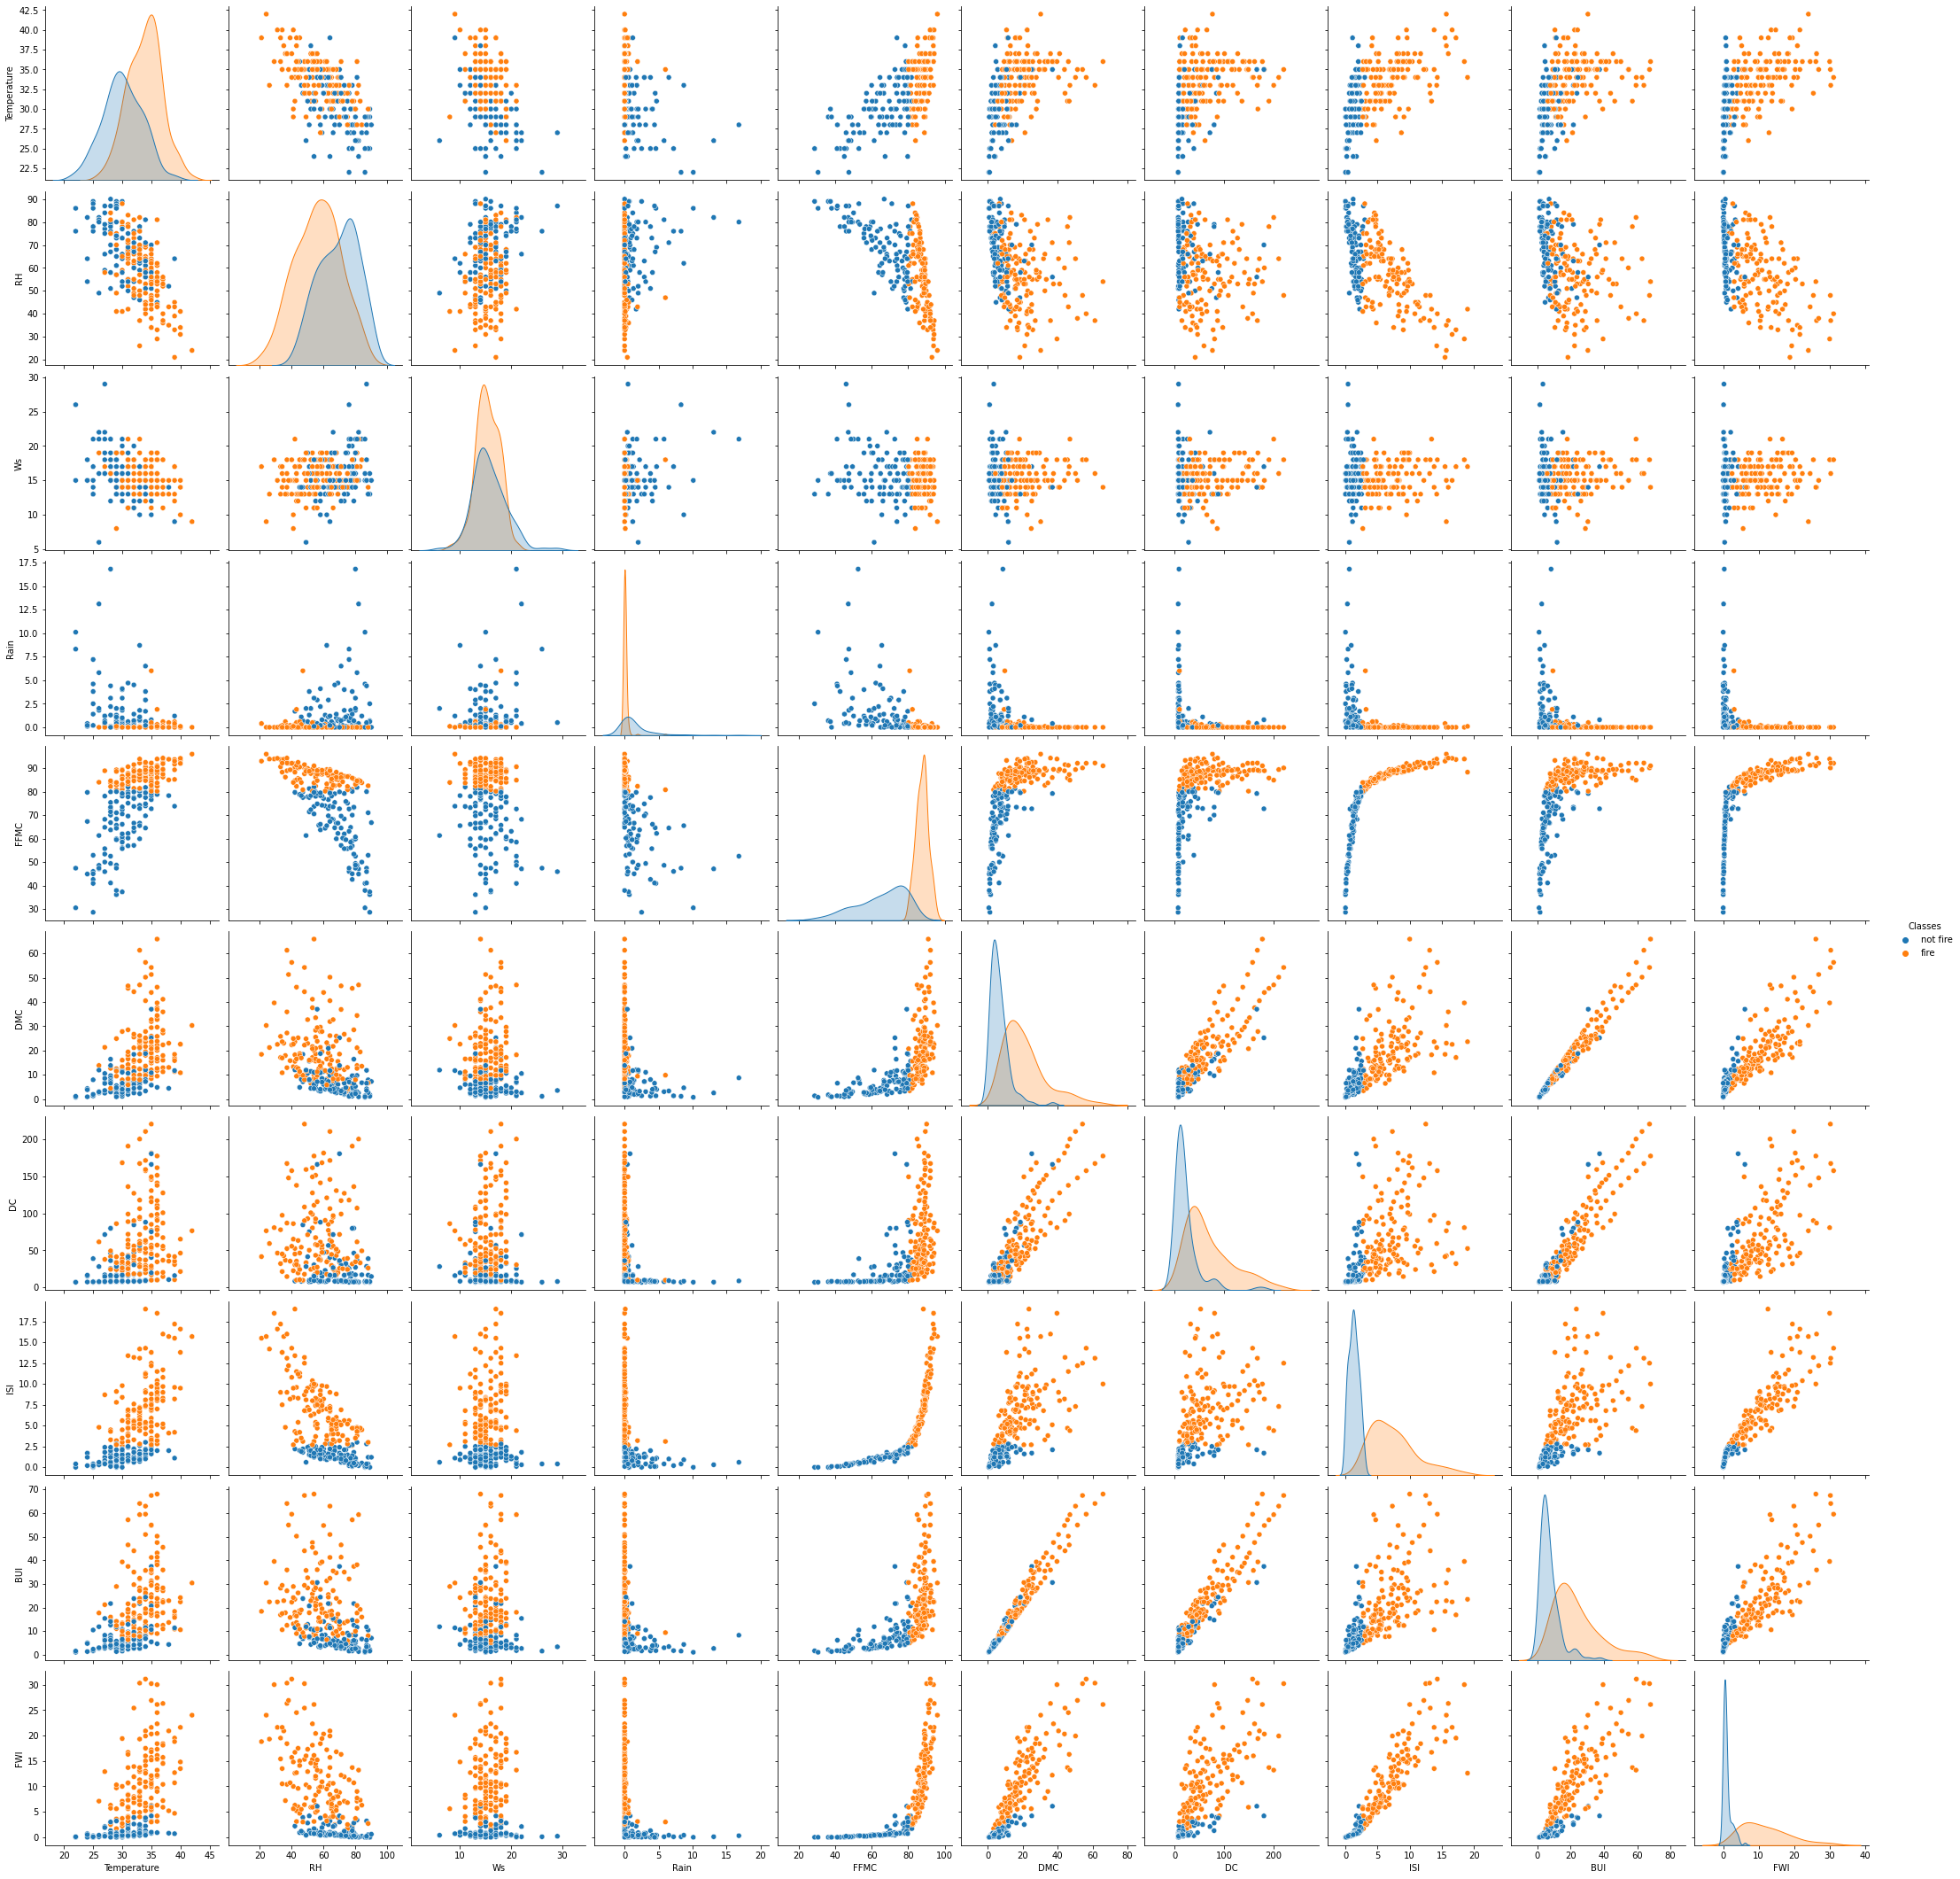

In [46]:
sns.pairplot(df,hue='Classes',size=3)

### Plotting Heatmap

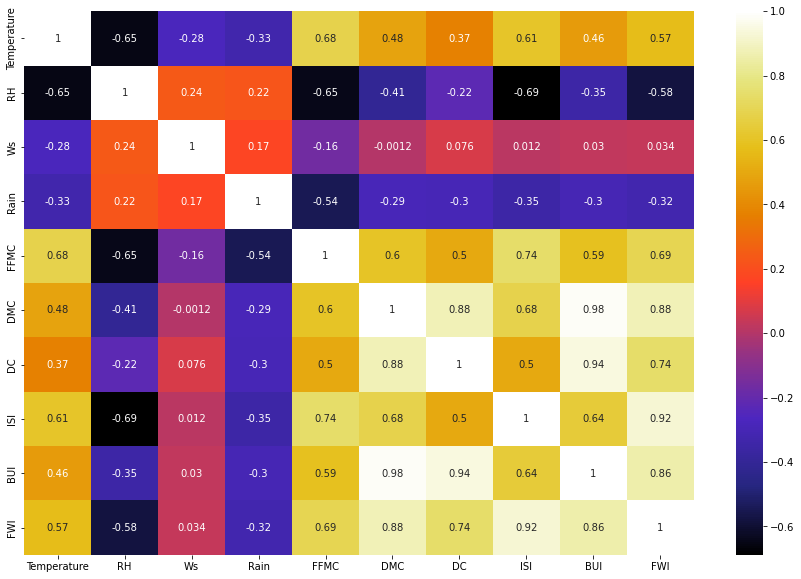

In [49]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

### Observation 

- Highly +ve correlated features are DMC and BUI - 'White color'
- Highly -ve correlated features are RH and Temp, RH and FFMC, RH and ISI - 'Black color'